Instalar Qiskit e importar as bibliotecas necessárias, incluindo numpy e pandas

In [ ]:
!pip install qiskit pylatexenc qiskit_algorithms qiskit_machine_learning qiskit-aer-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=612d076d2d62671a3ba3544a191570b4e0f2e00a67d606a41a19e04ee175524c
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae370

Separar datasets de treinamento e teste, separar as features que serão utilizadas.
Preencher nan com a média de valores da coluna.  // Testar também normalização [0;pi]

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("./train_normalized.csv")
test = pd.read_csv("./test_normalized.csv")

In [ ]:
y_train = train['label']
y_test = test['label']

## FEATURE SELECTION

In [ ]:
selected_features = ["proto", "orig_bytes", "conn_state", "resp_pkts", "resp_ip_bytes"]
num_features = len(selected_features)

In [ ]:
train = train[selected_features]
test = test[selected_features]

In [ ]:
train.head(5)

,proto,orig_bytes,conn_state,resp_pkts,resp_ip_bytes
0,0.5,0.000000e+00,0.000000,0.000000,0.000000e+00
1,0.5,0.000000e+00,0.000000,0.000000,0.000000e+00
2,0.5,0.000000e+00,0.000000,0.000000,0.000000e+00
3,0.5,0.000000e+00,0.000000,0.000000,0.000000e+00
4,0.5,2.382635e-07,0.833333,0.000017,6.178160e-07


Definir o Label para treinamento (característica que se quer prever)

## FEATURE MAP

ZZFeatureMap, ZFeatureMap, PauliFeatureMap (rodar com diferentes feature maps)

https://docs.quantum.ibm.com/api/qiskit/0.19/qiskit.circuit.library.PauliFeatureMap

#### ZZFeatureMap
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap

Nº de features = tamanho do vetor de features

FeatureMap = ZZFeatureMap com dimensões nº de features e 1 repetição

Decompose e draw FeatureMap, output "mpl", fold = 40

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

feature_map = ZZFeatureMap(num_features, reps = 1)

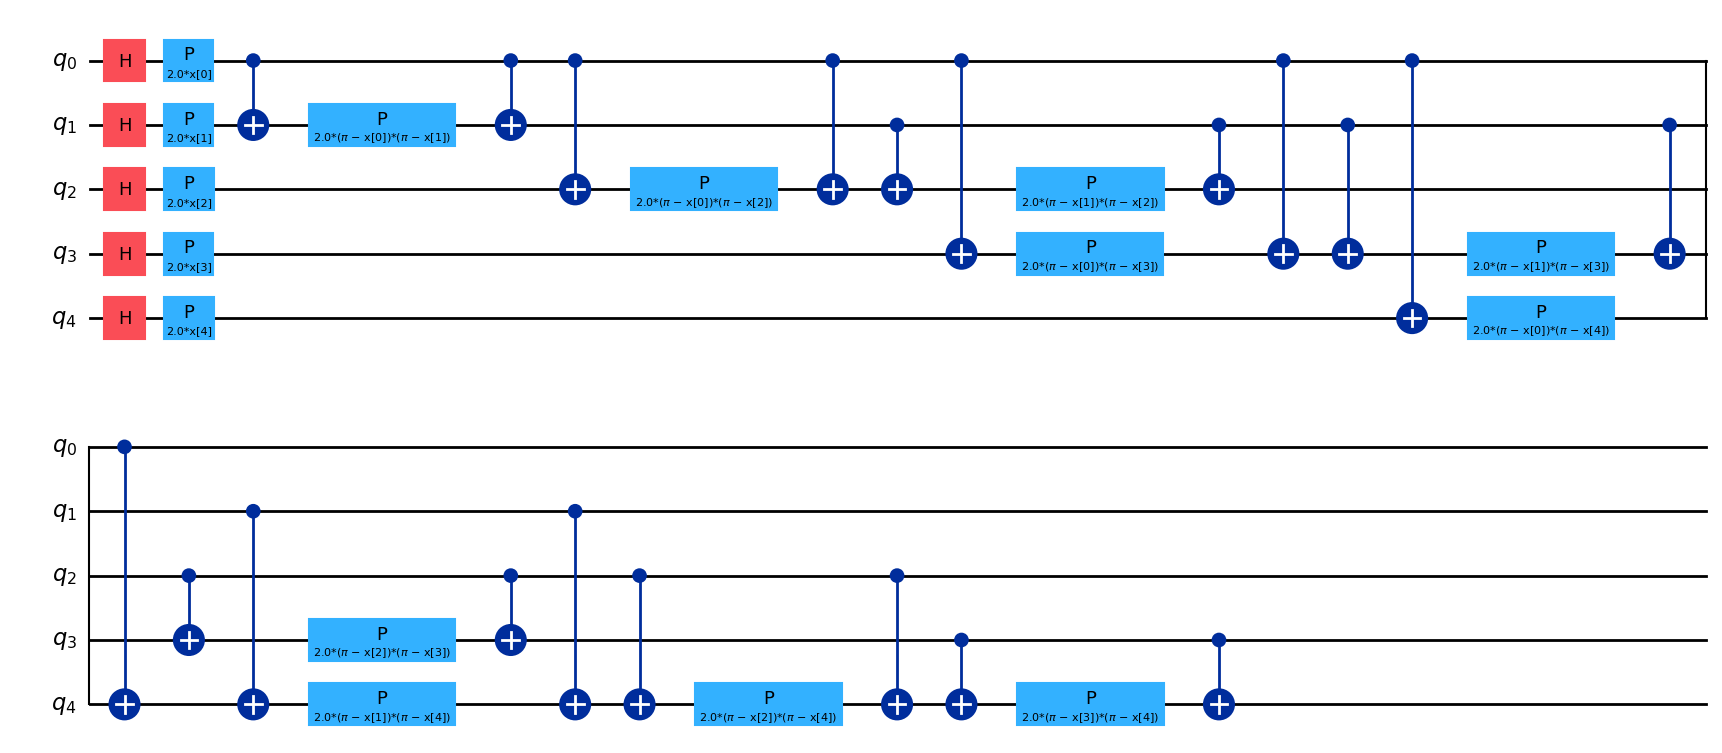

In [ ]:
feature_map.decompose().draw(output = "mpl", fold = 25)

## Ansatz

#### TwoLocal
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.TwoLocal -> ENTENDER MELHOR

TwoLocal.__Subclasses__() -> Ansatz = RealAmplitudes com nº de qubits = nº de features e 2 repetições

Decompose e draw Ansatz, output "mpl", fold = 20

In [ ]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_features, reps = 2)

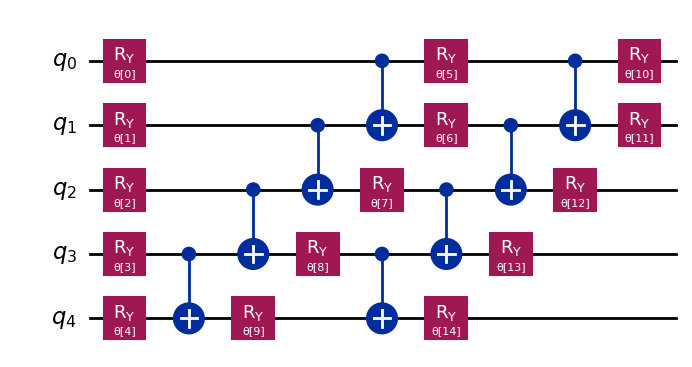

In [ ]:
ansatz.decompose().draw(output = "mpl", fold = 40)

## OTIMIZADOR

#### COBYLA
Importar o COBYLA do próprio Qiskit, da biblioteca de otimizadores -> https://docs.quantum.ibm.com/api/qiskit/0.28/qiskit.algorithms.optimizers.COBYLA

https://qiskit-community.github.io/qiskit-machine-learning/tutorials/10_effective_dimension.html

COBYLA(maxiter=100)

In [ ]:
from qiskit_algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter=100)

#### DARBO
Pesquisar como importar

https://github.com/sherrylixuecheng/EMQAOA-DARBO

## SAMPLER
Erro no VQC, checar motivo

Importar Sampler, shots=512 -> https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorSampler

In [ ]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()

## Callback Function
Importar pyplot para plotar gráfico da função custo pelas iterações - callback_graph

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"]= (12,6)

def callback_graph(weight, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Função de Custo")
    plt.xlabel("Iterações")
    plt.ylabel("Função de Custo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


## VQC
Importar classificador VQC do Qiskit -> https://github.com/qiskit-community/qiskit-machine-learning // https://qiskit-community.github.io/qiskit-machine-learning/getting_started.html#installation

VQC { sampler = sampler; feature_map = feature_map, ansatz = ansatz; optimizer = optimizer; callback = callback_graph }

Importar time para visualizar o tempo de execução

VQC.fit(train_features, train_labels.values)

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

sim = AerSimulator(method='statevector', device='GPU')


vqc = VQC(
    #sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
    pass_manager=generate_preset_pass_manager(backend=sim)
)

objective_func_vals= []
start = time.time()
vqc.fit(train, y_train.values)
elapsed = time.time() - start

vqc.save("vqc")

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_acc = vqc.score(train, y_train)
print(f'Acuracia: {round(train_acc,2)*100}%')

Rodar com o teste -> VQC.predict(test);

Realizar avaliação dos resultados (acurácia, precisão, recall...)

In [ ]:
y_predicted = vqc.predict(test)

y_predicted

In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_predicted))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

In [ ]:
from pandas import DataFrame

from google.colab import drive
drive.mount('/content/gdrive')

df = DataFrame(y_predicted)
df.to_csv('/content/gdrive/y_predicted.csv', index=False)

NameError: name 'vqc' is not defined